In [1]:
import numpy as np
import xarray as xr
from siphon.catalog import TDSCatalog
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'siphon'

In [20]:
base_url+filename

'http://smode.whoi.edu:8080/thredds/fileServer/insitu/navo_glider/ng780_2021_0913_2119_0123094W_037128N_21242000094.nc'

In [50]:
base_url = 'http://smode.whoi.edu:8080/thredds/dodsC/insitu/navo_glider/'
cat = TDSCatalog('http://smode.whoi.edu:8080/thredds/catalog/insitu/navo_glider/catalog.html')

In [59]:
# print("\n".join(cat.datasets.keys()))

In [70]:
# Get single data file
glider_data = xr.open_dataset(base_url+'ng780_2021_0906_1120_0123737W_037354N_21242000057.nc')

In [72]:
glider_data

<xarray.Dataset>
Dimensions:           (temp_flag_num: 2, salt_flag_num: 2, time: 1597, prof_num: 2)
Dimensions without coordinates: temp_flag_num, salt_flag_num, time, prof_num
Data variables: (12/15)
    temp_flag_index   (temp_flag_num) int32 ...
    temp_flag         (temp_flag_num) int32 ...
    salt_flag_index   (salt_flag_num) int32 ...
    salt_flag         (salt_flag_num) int32 ...
    latitude          (time) float32 37.36 37.36 37.36 ... 37.36 37.36 37.36
    longitude         (time) float32 -123.7 -123.7 -123.7 ... -123.7 -123.7
    ...                ...
    conductivity      (time) float32 ...
    cond_orig         (time) float32 ...
    salinity          (time) float32 ...
    depth             (time) float32 ...
    prof_start_index  (prof_num) int32 ...
    prof_end_index    (prof_num) int32 ...
Attributes: (12/14)
    Conventions:                       CF-1.0
    instrumentid:                      NG780
    institution:                       Naval Oceanographic Offic
    history:                           Written Sep 06, 2021 12:03
    dive_number:                       21242000057
    file_version:                      2.0
    ...                                ...
    Glidertype:                        Slocum_Glider
    tbdfound:                          1
    Classification:                    PUBLIC RELEASE
    Classification_Key:                100
    Classification_Statement:          *** UNCLASSIFIED PUBLIC DOMAIN *** DIS...
    Received_yyyy_mm_dd_hh_mm_ss_gmt:  2021 09 06 11 20 58

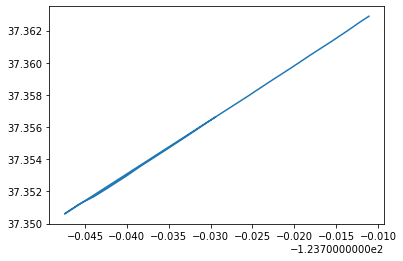

In [71]:
plt.plot(glider_data.longitude,glider_data.latitude)

In [66]:
# Get data from single glider
filelist=[file for file in cat.datasets if file.startswith('ng780')]
datapath = [base_url+f for f in filelist]

In [69]:
filename = 'ng780_2021_0913_2119_0123094W_037128N_21242000094.nc'
ng780 = xr.open_mfdataset(datapath,combine='by_coords',parallel=True)

ValueError: Could not find any dimension coordinates to use to order the datasets for concatenation